[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/)

# __DATA PREPARATION__

In [1]:
# Import Dependencies

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

sns.set()
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import the CSV file. Make sure the file is available in your Google Drive

Data = pd.read_csv('/content/drive/MyDrive/raw_dataset.csv')

In [3]:
# Print the shape of the data

print(Data.shape)

(1309, 13)


### Column Descriptions

- PassengerId = Passenger ID
- Survived: Survival (0 = No; 1 = Yes)
- Pclass: Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
- Name: Name
- sex: Sex
- Age: Age
- SibSp: Number of Siblings/Spouses Aboard
- parch: Number of Parents/Children Aboard
- Ticket: Ticket Number
- Fare: Passenger Fare (British pound)
- Cabin: Cabin
- Embarked: Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
- boat: Boat identification number
- body: Body identification number for passengers who did not survive

In [4]:
# View the summary statistic of all columns including non-numeric columns

Data.describe(include ='all')

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body
count,1309.000000,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308.000000,295,1307,486,121.000000
unique,NaN,NaN,1307,2,NaN,NaN,NaN,929,NaN,186,3,27,NaN
top,NaN,NaN,Connolly. Miss. Kate,male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S,13,NaN
freq,NaN,NaN,2,843,NaN,NaN,NaN,11,NaN,6,914,39,NaN
mean,2.294882,0.381971,NaN,NaN,29.881135,0.498854,0.385027,NaN,33.295479,NaN,NaN,NaN,160.809917
std,0.837836,0.486055,NaN,NaN,14.413500,1.041658,0.865560,NaN,51.758668,NaN,NaN,NaN,97.696922
min,1.000000,0.000000,NaN,NaN,0.166700,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,1.000000
25%,2.000000,0.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,NaN,72.000000
50%,3.000000,0.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN,155.000000
75%,3.000000,1.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN,NaN,256.000000


In [5]:
# View the DataFrame

Data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body
0,1,1,Allen. Miss. Elisabeth Walton,female,29.0000,0,0,24160,211.3375,B5,S,2,NaN
1,1,1,Allison. Master. Hudson Trevor,male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN
2,1,0,Allison. Miss. Helen Loraine,female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN
3,1,0,Allison. Mr. Hudson Joshua Creighton,male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0
4,1,0,Allison. Mrs. Hudson J C (Bessie Waldo Daniels),female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN


In [6]:
# Find the number of missing values

Data.isnull().sum()

pclass         0
survived       0
name           0
sex            0
age          263
sibsp          0
parch          0
ticket         0
fare           1
cabin       1014
embarked       2
boat         823
body        1188
dtype: int64

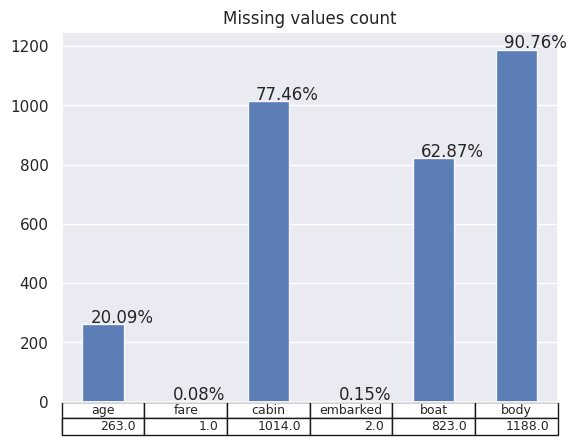

In [7]:
# Missing values

# number of rows
rows_length = Data.shape[0]
# fields with missing value count
fields_with_nan_length = Data.isna().sum().where(lambda x : x > 0).dropna()

ax = fields_with_nan_length \
.plot(kind='bar', alpha=0.9, title='Missing values count', table=True)
ax.xaxis.set_visible(False) # hide x axis labels


# write percentage on top of each bar
for i in ax.patches:
    ax.text(i.get_x()+.1, i.get_height()+5, \
            str(round((i.get_height()/rows_length)*100, 2))+'%')

In [8]:
# Creating a function to fill missing values in Age with the help of Pclass

def fill_age(cols):
    age = cols[0]
    pclass = cols[1]
    
    if pd.isnull(age):
        if pclass == 1:
            return 37
        
        if pclass == 2:
            return 29
        
        if pclass == 3:
            return 24
        
        
    else:
        return age

In [9]:
# Filling missing values
Data['age']= Data[['age', 'pclass']].apply(fill_age, axis=1)
Data

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body
0,1,1,Allen. Miss. Elisabeth Walton,female,29.0000,0,0,24160,211.3375,B5,S,2,NaN
1,1,1,Allison. Master. Hudson Trevor,male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN
2,1,0,Allison. Miss. Helen Loraine,female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN
3,1,0,Allison. Mr. Hudson Joshua Creighton,male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0
4,1,0,Allison. Mrs. Hudson J C (Bessie Waldo Daniels),female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,Zabour. Miss. Hileni,female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0
1305,3,0,Zabour. Miss. Thamine,female,24.0000,1,0,2665,14.4542,NaN,C,NaN,NaN
1306,3,0,Zakarian. Mr. Mapriededer,male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0
1307,3,0,Zakarian. Mr. Ortin,male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN


In [10]:
Data.isnull().sum()

pclass         0
survived       0
name           0
sex            0
age            0
sibsp          0
parch          0
ticket         0
fare           1
cabin       1014
embarked       2
boat         823
body        1188
dtype: int64

In [12]:
# Perform one-hot coding to represent categorical column as numerical column.

embarked = pd.get_dummies(Data['embarked'])
sex = pd.get_dummies(Data['sex'])
pclass = pd.get_dummies(Data['pclass'])

Data = pd.concat([Data,embarked, sex, pclass], axis=1)
Data

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,...,boat,body,C,Q,S,female,male,1,2,3
0,1,1,Allen. Miss. Elisabeth Walton,female,29.0000,0,0,24160,211.3375,B5,...,2,NaN,0,0,1,1,0,1,0,0
1,1,1,Allison. Master. Hudson Trevor,male,0.9167,1,2,113781,151.5500,C22 C26,...,11,NaN,0,0,1,0,1,1,0,0
2,1,0,Allison. Miss. Helen Loraine,female,2.0000,1,2,113781,151.5500,C22 C26,...,NaN,NaN,0,0,1,1,0,1,0,0
3,1,0,Allison. Mr. Hudson Joshua Creighton,male,30.0000,1,2,113781,151.5500,C22 C26,...,NaN,135.0,0,0,1,0,1,1,0,0
4,1,0,Allison. Mrs. Hudson J C (Bessie Waldo Daniels),female,25.0000,1,2,113781,151.5500,C22 C26,...,NaN,NaN,0,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,Zabour. Miss. Hileni,female,14.5000,1,0,2665,14.4542,NaN,...,NaN,328.0,1,0,0,1,0,0,0,1
1305,3,0,Zabour. Miss. Thamine,female,24.0000,1,0,2665,14.4542,NaN,...,NaN,NaN,1,0,0,1,0,0,0,1
1306,3,0,Zakarian. Mr. Mapriededer,male,26.5000,0,0,2656,7.2250,NaN,...,NaN,304.0,1,0,0,0,1,0,0,1
1307,3,0,Zakarian. Mr. Ortin,male,27.0000,0,0,2670,7.2250,NaN,...,NaN,NaN,1,0,0,0,1,0,0,1


In [13]:
# Drop unnecessary columns

Data.drop(['boat','body','embarked','name','ticket','cabin','sex'],axis=1,inplace=True)

In [14]:
# Check for NaN values

Data.isnull().sum()

pclass      0
survived    0
age         0
sibsp       0
parch       0
fare        1
C           0
Q           0
S           0
female      0
male        0
1           0
2           0
3           0
dtype: int64

In [15]:
# Drop NaN values

Data.dropna(inplace=True)

In [18]:
# Rename Columns

Data = Data.rename(columns={1:'First Class', 2:'Second Class', 3:'Third Class'})

In [19]:
Data.head()

,pclass,survived,age,sibsp,parch,fare,C,Q,S,female,male,First Class,Second Class,Third Class
0,1,1,29.0000,0,0,211.3375,0,0,1,1,0,1,0,0
1,1,1,0.9167,1,2,151.5500,0,0,1,0,1,1,0,0
2,1,0,2.0000,1,2,151.5500,0,0,1,1,0,1,0,0
3,1,0,30.0000,1,2,151.5500,0,0,1,0,1,1,0,0
4,1,0,25.0000,1,2,151.5500,0,0,1,1,0,1,0,0


# __NEURAL NETWORK__

In [20]:
# Splitting the data into features and target

# Target
y = Data['survived']
# Features
X = Data.drop('survived', axis=1)

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 0)

In [21]:
# Scaling using StandardScaler instances

# Create a StandardScaler instances
scaler = StandardScaler()

#Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Training and Evaluating the Model

In [22]:
# X_train_scaled[0] gives us the first row of the scaled train data
# Find the number of input variables

len(X_train_scaled[0])

13

In [23]:
# Defining the deep neural network and its number of input features and hidden nodes for each layer

input_features = len(X_train_scaled[0])
layer1 = 26
layer2 = 13

nn = tf.keras.models.Sequential()

# Add the first hidden layer
nn.add(tf.keras.layers.Dense(units=layer1, input_dim=input_features, activation='relu'))

# Add the second hidden layer
nn.add(tf.keras.layers.Dense(units=layer2, activation='relu'))

# Add the outer layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 26)                364       
                                                                 
 dense_1 (Dense)             (None, 13)                351       
                                                                 
 dense_2 (Dense)             (None, 1)                 14        
                                                                 
Total params: 729
Trainable params: 729
Non-trainable params: 0
_________________________________________________________________


In [24]:
# Compiling the model

nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
# Training the model

fit_model = nn.fit(X_train_scaled, y_train, epochs=200)

Epoch 1/200
31/31 [==============================] - 2s 3ms/step - loss: 0.6568 - accuracy: 0.6463
Epoch 2/200
31/31 [==============================] - 0s 3ms/step - loss: 0.5657 - accuracy: 0.7615
Epoch 3/200
31/31 [==============================] - 0s 2ms/step - loss: 0.5211 - accuracy: 0.7900
Epoch 4/200
31/31 [==============================] - 0s 2ms/step - loss: 0.4942 - accuracy: 0.7910
Epoch 5/200
31/31 [==============================] - 0s 2ms/step - loss: 0.4781 - accuracy: 0.7870
Epoch 6/200
31/31 [==============================] - 0s 3ms/step - loss: 0.4663 - accuracy: 0.7910
Epoch 7/200
31/31 [==============================] - 0s 2ms/step - loss: 0.4564 - accuracy: 0.7931
Epoch 8/200
31/31 [==============================] - 0s 2ms/step - loss: 0.4505 - accuracy: 0.7900
Epoch 9/200
31/31 [==============================] - 0s 2ms/step - loss: 0.4428 - accuracy: 0.7951
Epoch 10/200
31/31 [==============================] - 0s 3ms/step - loss: 0.4385 - accuracy: 0.7941
Epoch 11/

In [26]:
# Evaluating the model uding the test data

model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

11/11 - 0s - loss: 0.4777 - accuracy: 0.8104 - 267ms/epoch - 24ms/step
Loss: 0.4776560068130493, Accuracy: 0.8103975653648376


In [27]:
# Exporting the model to HDF5 file

nn.save('titanicneural.h5')

Summary and Analysis:

The neural network is the first of several models we used to predict the survival outcome of the Titanic tragedy.
After cleaning up and scaling the data set, we used 13 input features to predict the outcome of passenger survival.
We used two hidden layers that consisted of 26 and 13 neurons, with 1 neuron in the outcome layer for binary classification purpose.
The ReLu function was used as our activation function for the two hidden layers, as the function is computationally more efficient than Tanh.
The function also helps to address the vanishing gradient problem, which can lead to slower training and lower accuracy.

We used the sigmoid function for our outcome layer due to its binary nature.
With epoch set to 200, the model's accuracy was 0.81 with loss at 0.48.